# 2D Design Template

## Students Submission
- Names of the group members, and a short sentence summarizing each member’s contribution.

#### Group 9
- Ling John Wei (1007138)
- Khairul Shabir Bin (1006881)
- Hetavi Shah (1007034)
- Ho Atsadet (1006934)
- Shruti Kunder (1007089)

#### Quick access these sections
- [Problem statement](#problem-statement)
- [Dataset](#dataset)
- [Features and target preparation](#features-and-target-preparation)
- [Building the model](#building-model)
- [Evaluating the model](#evaluating-the-model)
- [Improving the model](#improving-the-model)
- [Discussion and analysis](#discussion-and-analysis)

## Overview
- The purpose of this project is for you to apply what you have learnt in this course. This includes working with data and visualizing it, create model of linear regression or logistic regression, as well as using metrics to measure the accuracy of your model. 
- Please find the project handout description in the following [link](https://sutdapac-my.sharepoint.com/:b:/g/personal/franklin_anariba_sutd_edu_sg/EaaE7XKJ0ZtJntc2IxEPiIYBVjijsZ5tUaPaH7mejSveWQ?e=1qADfd).

#### Background
As we approach a global population of 9 billion by 2050, ensuring sustainable ways to meet basic human needs becomes increasingly urgent. Addressing food security is a paramount concern in this scenario, and India plays a crucial role as the largest exporter of staple crops, particularly rice. With nearly 40 percent of total rice exports and a projection to reach 54 million tonnes in the 2022-2023 crop year, India's rice production significantly impacts global food security. 

Focusing our model on Indian rice production is key because the world heavily relies on rice as a staple, making it a center in the global food supply. By understanding and optimizing rice production in India, we aim to contribute to the broader challenge of ensuring a sustainable and secure global food future.

#### User Persona
1. Eddie is running a large farm on the coast of a city growing crops like wheat, rice, and tomatoes. Often, Eddie finds himself putting too much or too little fertiliser in the soil of his crops, resulting in a lot of his crops not growing healthily.
Pain Points:
Faces challenges in optimising the amount of fertiliser for various crops, especially finding difficulty in finding the right amount of fertiliser to use. 
Desire precise data on temperature, precipitation, and soil quality for tailored cultivation in controlled environments. Aims to maximise crop production and resource efficiency in a limited urban space.

2. James owns a large-scale agricultural operation in a temperate zone with varying precipitation patters that grows a variety of crops.
Pain Points:
Challenges in determining the optimal temperature range for different crops to maximise yield.
Difficulty in managing irrigation and water resources
Lack of information on the impact of precipitation on crop growth
Difficulty in understanding the impact of temperature on crop growth and yield.
Lack of tools or models that integrate temperature data with other factors like fertilizer usage and for comprehensive analysis.
Desire to mitigate the risks associated with extreme temperature events and their impact on crop yield as well as precipitation data to plan for irrigation in order to maximise crop production.



#### Problem Statement

How might we predict the amount of crop yield in a given area given the information on the climate and soil nutrients used to empower farmers with actionable insights for efficient resource management and agricultural practices?

## Dataset
- Describe here your data set. Put the link to the sources of your dataset. Describe your data and what are the columns.
- Put some Python codes here to describe and visualize your data.

#### Dataset used and the brief description
Dataset selected is based on the specific features that we are interested in.
- Nitrogen value: Dataset on nitrogen fertiliser used per cropland in India from 1961-2021
    - https://www.fao.org/faostat/en/#compare

- Phosphate value: Dataset on phosphate fertiliser used per cropland in India from 1961-2021
    - https://www.fao.org/faostat/en/#compare

- Potash value: Dataset on potash fertiliser used per cropland in India from 1961-2021
    - https://www.fao.org/faostat/en/#compare

- Rice yield: Dataset on annual rice yield in India from 1961-2021
    - https://www.fao.org/faostat/en/#compare

- Rainfall: Dataset on average annual rainfall in India from 1901-2015
    - https://www.kaggle.com/datasets/rajanand/rainfall-in-india?select=rainfall+in+india+1901-2015.csv

- Temperature: Dataset on average annual temperature in India from 1901-2015
    - https://www.kaggle.com/datasets/venky73/temperatures-of-india

#### Libraries imported

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Loading datasets

In [2]:
#dataset defining
df_rainfall = pd.read_csv('rainfall_india.csv', index_col=0)
df_nitrogen = pd.read_csv('nvalue_per_area.csv', index_col=0)
df_temp = pd.read_csv('temp_india.csv', index_col=0)
df_yield = pd.read_csv('rice_yield_india.csv', index_col=0)
df_potash = pd.read_csv('kvalue_per_area.csv', index_col=0)
df_phosphate = pd.read_csv('pvalue_per_area.csv', index_col=0)


#### Describing datasets

In [3]:
print("\nRainfall ")
print(df_rainfall.describe())

print("\nNitrogen fertiliser used per cropland area")
print(df_nitrogen.describe())

print("\nTemperature")
print(df_temp.describe())

print("\nRice Yield")
print(df_yield.describe())

print("\nPotash fertiliser used per cropland area")
print(df_potash.describe())

print("\nPhosphate fertiliser used per cropland area")
print(df_phosphate.describe())


Rainfall 
              YEAR         JAN         FEB         MAR         APR  \
count   115.000000  115.000000  115.000000  115.000000  115.000000   
mean   1958.000000   19.759130   23.434783   28.254783   38.241739   
std      33.341666    9.992628   11.512739   12.286408   10.353040   
min    1901.000000    2.700000    2.700000    7.200000   16.100000   
25%    1929.500000   13.000000   13.300000   19.750000   31.600000   
50%    1958.000000   17.800000   22.500000   25.500000   37.400000   
75%    1986.500000   24.850000   30.300000   34.400000   43.850000   
max    2015.000000   58.500000   53.800000   63.300000   69.400000   

              MAY         JUN         JUL         AUG         SEP         OCT  \
count  115.000000  115.000000  115.000000  115.000000  115.000000  115.000000   
mean    62.193913  168.360000  291.022609  258.400870  172.473043   75.701739   
std     15.673378   35.569654   41.161390   34.975419   36.641234   28.268152   
min     32.100000   86.500000  138

#### Columns of each dataset
- Columns of the data provides basic information of what the dataset entails, making it easier for us to clean the datasets.

In [4]:
# Dataset on annual rainfall
df_rainfall.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
REGION,,,,,,,,,,,,,,,,,,
INDIA,1901,34.7,37.7,18.0,39.3,50.8,113.4,242.2,272.9,124.4,52.7,38.0,8.3,1032.3,72.4,108.1,752.8,99.0
INDIA,1902,7.4,4.3,19.0,43.5,48.3,108.8,284.0,199.7,201.5,61.5,27.9,24.4,1030.2,11.7,110.8,794.0,113.8
INDIA,1903,17.0,8.3,31.3,17.1,59.5,118.3,297.0,270.4,199.1,117.9,36.9,17.7,1190.5,25.3,107.9,884.8,172.5
INDIA,1904,14.4,9.6,31.8,33.1,72.4,164.8,261.0,206.4,129.6,69.0,11.2,16.3,1019.8,24.0,137.4,761.8,96.6
INDIA,1905,25.3,20.9,42.7,33.7,55.7,93.3,252.8,200.8,178.4,51.4,9.7,10.5,975.3,46.2,132.2,725.4,71.6


In [5]:
# Dataset on annual temperature
df_temp.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
YEAR,,,,,,,,,,,,,,,,,
1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


In [6]:
# Dataset on nitrogen fertiliser used per cropland area
df_nitrogen.head()

,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
Domain Code,,,,,,,,,,,,,,
RFN,Fertilizers by Nutrient,100,India,5159,Use per area of cropland,3102,Nutrient nitrogen N (total),1961,1961,kg/ha,1.55,E,Estimated value,NaN
RFN,Fertilizers by Nutrient,100,India,5159,Use per area of cropland,3102,Nutrient nitrogen N (total),1962,1962,kg/ha,2.05,E,Estimated value,NaN
RFN,Fertilizers by Nutrient,100,India,5159,Use per area of cropland,3102,Nutrient nitrogen N (total),1963,1963,kg/ha,2.33,E,Estimated value,NaN
RFN,Fertilizers by Nutrient,100,India,5159,Use per area of cropland,3102,Nutrient nitrogen N (total),1964,1964,kg/ha,3.42,E,Estimated value,NaN
RFN,Fertilizers by Nutrient,100,India,5159,Use per area of cropland,3102,Nutrient nitrogen N (total),1965,1965,kg/ha,3.54,E,Estimated value,NaN


In [7]:
# Dataset on phosphate fertiliser used per cropland area
df_phosphate.head()

,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
Domain Code,,,,,,,,,,,,,,
RFN,Fertilizers by Nutrient,100,India,5159,Use per area of cropland,3103,Nutrient phosphate P2O5 (total),1961,1961,kg/ha,0.38,E,Estimated value,NaN
RFN,Fertilizers by Nutrient,100,India,5159,Use per area of cropland,3103,Nutrient phosphate P2O5 (total),1962,1962,kg/ha,0.51,E,Estimated value,NaN
RFN,Fertilizers by Nutrient,100,India,5159,Use per area of cropland,3103,Nutrient phosphate P2O5 (total),1963,1963,kg/ha,0.72,E,Estimated value,NaN
RFN,Fertilizers by Nutrient,100,India,5159,Use per area of cropland,3103,Nutrient phosphate P2O5 (total),1964,1964,kg/ha,0.92,E,Estimated value,NaN
RFN,Fertilizers by Nutrient,100,India,5159,Use per area of cropland,3103,Nutrient phosphate P2O5 (total),1965,1965,kg/ha,0.82,E,Estimated value,NaN


In [8]:
# Dataset on potash fertiliser used per cropland area
df_potash.head()

,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
Domain Code,,,,,,,,,,,,,,
RFN,Fertilizers by Nutrient,100,India,5159,Use per area of cropland,3104,Nutrient potash K2O (total),1961,1961,kg/ha,0.17,E,Estimated value,NaN
RFN,Fertilizers by Nutrient,100,India,5159,Use per area of cropland,3104,Nutrient potash K2O (total),1962,1962,kg/ha,0.22,E,Estimated value,NaN
RFN,Fertilizers by Nutrient,100,India,5159,Use per area of cropland,3104,Nutrient potash K2O (total),1963,1963,kg/ha,0.31,E,Estimated value,NaN
RFN,Fertilizers by Nutrient,100,India,5159,Use per area of cropland,3104,Nutrient potash K2O (total),1964,1964,kg/ha,0.43,E,Estimated value,NaN
RFN,Fertilizers by Nutrient,100,India,5159,Use per area of cropland,3104,Nutrient potash K2O (total),1965,1965,kg/ha,0.48,E,Estimated value,NaN


In [9]:
# creating a new dataset and renaming the required columns for greater readability
df_rainfall = df_rainfall.rename(columns={'ANNUAL': 'Rainfall'})
df_nitrogen = df_nitrogen.rename(columns={'Value': 'Nutrients_N'})
df_temp = df_temp.rename(columns={'ANNUAL': 'Temp'})
df_potash = df_potash.rename(columns={'Value': 'Nutrients_P'})
df_yield = df_yield.rename(columns={'Value': 'Yield'})
df_phosphate = df_phosphate.rename(columns={'Value': 'Nutrients_Ph'})

#### Visualisation of dataset
- Allows us to better understand the data we are dealing with, which is helpful in finding most suitable model.

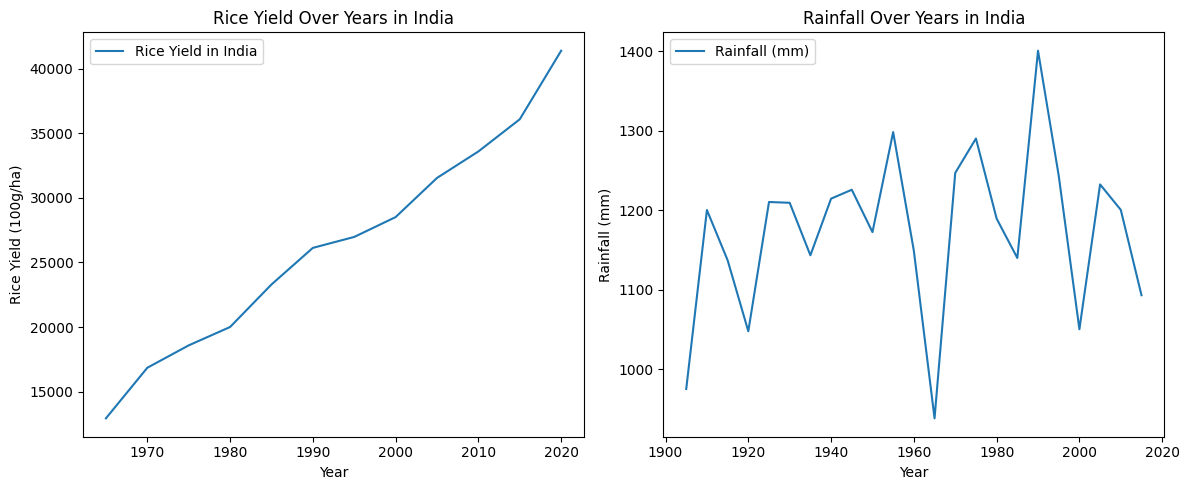

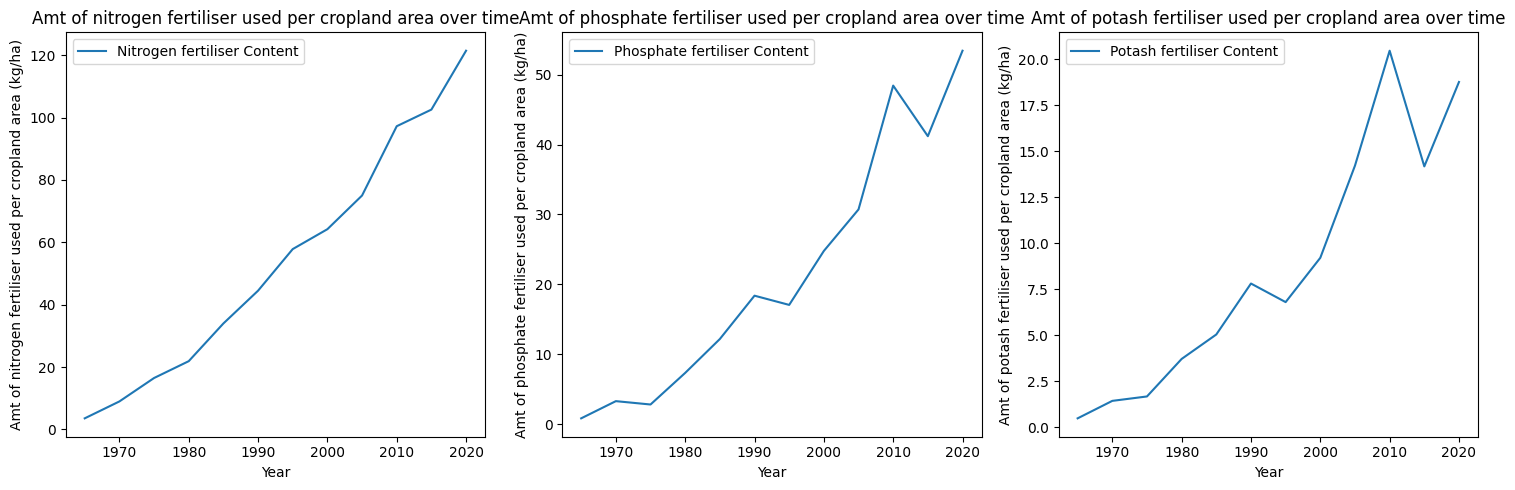

In [10]:
# Set up subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot annual rice yield against time
df_rice = df_yield[df_yield['Year'] % 5 == 0]
axes[0].plot(df_rice['Year'], df_rice['Yield'], label='Rice Yield in India')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Rice Yield (100g/ha)')
axes[0].set_title('Rice Yield Over Years in India')
axes[0].legend()

# Plot annual rainfall against time
filtered_rainfall = df_rainfall[df_rainfall['YEAR'] % 5 == 0]
axes[1].plot(filtered_rainfall['YEAR'], filtered_rainfall['Rainfall'], label='Rainfall (mm)')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Rainfall (mm)')
axes[1].set_title('Rainfall Over Years in India')
axes[1].legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()

# Filter DataFrame for the selected years
filtered_nitrogen = df_nitrogen[df_nitrogen['Year'] % 5 == 0]
filtered_phosphate = df_phosphate[df_phosphate['Year'] % 5 == 0]
filtered_potash = df_potash[df_potash['Year'] % 5 == 0]

# Set up subplots with 1 row and 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot amount of nitrogen fertilisers used per cropland area against time in years
axes[0].plot(filtered_nitrogen['Year'], filtered_nitrogen['Nutrients_N'], label='Nitrogen fertiliser Content')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Amt of nitrogen fertiliser used per cropland area (kg/ha)')
axes[0].set_title('Amt of nitrogen fertiliser used per cropland area over time')
axes[0].legend()

# Plot amount of phosphate fertilisers used per cropland area against time in years
axes[1].plot(filtered_phosphate['Year'], filtered_phosphate['Nutrients_Ph'], label='Phosphate fertiliser Content')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Amt of phosphate fertiliser used per cropland area (kg/ha)')
axes[1].set_title('Amt of phosphate fertiliser used per cropland area over time')
axes[1].legend()

# Plot amount of potash fertilisers used per cropland area against time in years
axes[2].plot(filtered_potash['Year'], filtered_potash['Nutrients_P'], label='Potash fertiliser Content')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Amt of potash fertiliser used per cropland area (kg/ha)')
axes[2].set_title('Amt of potash fertiliser used per cropland area over time')
axes[2].legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()

## Features and Target Preparation
- Describe here what are the features you use and why these features. Put any Python codes to prepare and clean up your features. 
- Do the same thing for the target. Describe your target and put any codes to prepare your target.

#### Features and target chosen
Initially, we conducted some online research to determine the useful predictors that we would like to include in our model. We evaluate the usefulness of these indicators based the extent of effect they have on the crop yield in a given year and arrived at the following predictor indicators that has the largest effect on rice yield:
- Avergage annual temperature of India (degree celcius)
- Average rainfall in India (mm)
- Nitrogen fertiliser used per cropland area in India (kg/ha)
- Phosphate fertiliser used per cropland area in India (kg/ha)
- Potash fertiliser used per cropland area in India (kg/ha)

Since the goal is to predict crop yield in India, namely rice, the target is:
- Annual rice yield in India (100g/ha)

#### Combining and cleaning data from 1961-2015 into a single dataframe
Since we selected each dataset based on the specific feature we are interested in, little cleaning is needed to obtain our required data.

In [11]:
# Reset indices
df_rainfall.reset_index(inplace=True)
df_nitrogen.reset_index(inplace=True)
df_temp.reset_index(inplace=True)
df_yield.reset_index(inplace=True)
df_potash.reset_index(inplace=True)
df_phosphate.reset_index(inplace=True)

#Selection of data from 1961-2015
new_temp=df_temp['Temp'][(df_temp['YEAR'] >= 1961) & (df_temp['YEAR'] <= 2015)].reset_index(drop=True)
new_r=df_rainfall['Rainfall'][(df_rainfall['YEAR'] >= 1961) & (df_rainfall['YEAR'] <= 2015)].reset_index(drop=True)
df_combined = pd.concat([new_r, new_temp, df_yield['Yield'],df_potash['Nutrients_P'],df_phosphate['Nutrients_Ph'],df_nitrogen['Nutrients_N'],df_yield['Year']], axis=1)
df_combined['Yield'] = df_combined['Yield'] / 1000

#Find number of empty rows
empty_rows = df_combined[df_combined.isnull().any(axis=1)]

# Print the rows with empty values
print("No of empty rows : ",empty_rows.shape)

#drop empty rows
df_combined = df_combined.dropna()

# Display the resulting desired DataFrame to ensure that we correctly gathered all the required data
print(df_combined)

    

No of empty rows :  (6, 7)
    Rainfall   Temp   Yield  Nutrients_P  Nutrients_Ph  Nutrients_N  Year
0     1403.0  28.72  15.419         0.17          0.38         1.55  1961
1     1196.4  28.89  13.959         0.22          0.51         2.05  1962
2     1210.2  29.04  15.498         0.31          0.72         2.33  1963
3     1235.1  29.09  16.171         0.43          0.92         3.42  1964
4      938.4  29.16  12.936         0.48          0.82         3.54  1965
5     1064.0  29.41  12.952         0.70          1.53         4.53  1966
6     1148.3  29.14  15.484         1.04          2.04         6.32  1967
7     1054.2  29.07  16.134         1.03          2.32         7.34  1968
8     1147.7  29.61  16.094         1.28          2.53         8.24  1969
9     1247.0  29.47  16.849         1.43          3.28         8.96  1970
10    1218.0  29.15  17.110         1.83          3.39        10.93  1971
11     948.5  29.31  16.046         2.11          3.52        11.15  1972
12    1214.

#### Identify number of outliers
- To ensure we account for the presence of outliers as they may have significant effect on the mean square error and r2.

In [12]:
from scipy.stats import zscore

# Calculate z-scores only for numeric columns
numeric_columns = df_combined.select_dtypes(include=[np.number]).columns
z_scores = zscore(df_combined[numeric_columns])

# Identify outliers based on z-scores
outliers = (np.abs(z_scores) > 1.5).all(axis=1)
print("Number of outliers:", outliers.sum())

Number of outliers: 0


- No outliers found, we need not worry about any large discrepancies in r2 or mean square error due to outliers.

## Building Model
- Discussion on building the model and their Python codes.
- Any other relevant mathematical details.

#### Multiple Linear Regression Model that predicts Rice Yield in India 

The objective of the project is to develop a predictive model for estimating rice yield in India based on relevant environmental factors. The model utilizes a linear regression approach, incorporating features such as annual rainfall, annual average temperature, and amount of fertiliser used per cropland area such as nitrogen, phosphate and potash. 

Before any training or testing of the model, we have to prepare the data required first. So initially, the dataset is divided into training and test sets, and the features are normalized using z normalization. Once the data is prepared, we can implement the gradient descent function to optimise the regression coefficients. By iteratively adjusting these coefficients, the model aims to minimize the mean squared error, ultimately enhancing its predictive accuracy. 

The main challenge is to create a accurate predictive model give the limited amount of data points, especially in the complex context of predicting agricultural yield. The aim is to help decision-making in agriculture by giving reliable estimates of rice yield in India using important environmental factors.
 

#### Preparing data via normalisation/ feature scaling
-  The goal of normalising the features is to ensure that all features have the same scale so that no one feature has a higher impact on the model simply because they have larger numerical values. This is important because our combined dataset has certain features that have significantly higher range of numerical values than others.

> Standardization
$$normalised = \frac{data - \mu}{\sigma}$$

#### Functions created for preparing data

In [13]:
#z-normalisation function for all features
def normalize_z(dfin, columns_means=None, columns_stds=None):
    dfout = dfin.copy()
    
    if columns_means is None:
        columns_means = dfout.mean(axis=0) 
        
    if columns_stds is None:
        columns_stds = dfout.std(axis=0)
        
    dfout = (dfout - columns_means) / columns_stds
    
    return dfout, columns_means, columns_stds

def get_features_targets(df, feature_names, target_names):
    df_feature=df[feature_names]
    df_target=df[target_names]
    return df_feature, df_target

def prepare_feature(df_feature):
    rows,col=df_feature.shape
    if type(df_feature)==pd.DataFrame:
        np_feature=df_feature.to_numpy()
    else:
        np_feature=df_feature
    feature=np_feature.reshape(-1,col)
    x0=np.ones((rows,1))
    X=np.concatenate((x0,feature),axis=1)
    return X

def prepare_target(df_target):
    rows,col=df_target.shape
    if type(df_target)==pd.DataFrame:
        np_target=df_target.to_numpy()
    else:
        np_target=df_target
    target=np_target.reshape(-1,col)
    return target

# Train test split data function
def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    indexes=df_feature.index
    if random_state is not None:
        np.random.seed(random_state)
    k=int(test_size*len(indexes))
    test_indexes=np.random.choice(indexes, k, replace=False)
    train_indexes=list(set(indexes)-set(test_indexes))
    train_indexes, test_indexes=sorted(train_indexes), sorted(test_indexes)
    df_feature_train=df_feature.loc[train_indexes, :]
    df_feature_test=df_feature.loc[test_indexes, :]
    df_target_train =df_target.loc[train_indexes, :]
    df_target_test = df_target.loc[test_indexes, :]
                                    
    return df_feature_train, df_feature_test, df_target_train, df_target_test

#### Splitting data and normalising the features

In [14]:
# get features and targets from data frame
df_feature, df_target = get_features_targets(df_combined,["Rainfall","Temp","Nutrients_N","Nutrients_P","Nutrients_Ph"],["Yield"])

# split the data into training and test data sets
df_feature_train, df_feature_test, df_target_train, df_target_test = split_data(df_feature,df_target,random_state=42,test_size=0.2)


# normalize the feature using z normalization
df_feature_train_z,means,stds = normalize_z(df_feature_train)


X = prepare_feature(df_feature_train_z)
target = prepare_target(df_target_train)

#### Constructing the multiple linear regression model

- Linear regression is a linear model that follows the general equation:
$$y = \beta_0 + \beta_1 x$$

- Since we have 5 features and 1 target, our model will be based off the following equation:
$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_2 x_2 + \hat{\beta}_3 x_3 + \hat{\beta}_4 x_4 + \hat{\beta}_5 x_5$$

- The cost function that we will be using is:
$$J(\hat{\beta}_0, \hat{\beta}_1, \hat{\beta}_2, \hat{\beta}_3, \hat{\beta}_4, \hat{\beta}_5) = \frac{1}{2m}(\mathbf{\hat{y}}-\mathbf{y})^T\times (\mathbf{\hat{y}}-\mathbf{y})$$

- gradient descent function will be implemented based on the following equation:
$$\mathbf{\hat{b}} = \mathbf{\hat{b}} - \alpha \frac{1}{m}\mathbf{X}^T \times (\mathbf{\hat{y}} - \mathbf{y})$$

#### Functions created for constructing the multiple linear regression model

In [15]:
def r2_score(y, ypred):
    err=y-ypred
    ss_res=np.matmul(err.T,err)
    y_bar=np.mean(y)
    y_s=y-y_bar
    ss_tot=np.matmul(y_s.T,y_s)
    return 1- ss_res/ss_tot

def mean_squared_error(target, pred):
    target,pred=np.array(target),np.array(pred)
    n=target.shape[0]
    err=target-pred
    sq=np.matmul(err.T, err)
    return sq/n

def gradient_descent_linreg(X, y, beta, alpha, num_iters):
    m=X.shape[0]
    J_storage=[]
    for i in range(num_iters):
        j=compute_cost_linreg(X,y,beta)
        J_storage.append(j)
        y_hat=calc_linreg(X,beta)
        err=y_hat-y
        deriv=np.matmul(X.T,err)/m
        beta=beta-alpha*deriv
    return beta, J_storage


def predict_linreg(df_feature, beta, means=None, stds=None):
    df_feature,means,stds=normalize_z(df_feature,means,stds)
    feature=prepare_feature(df_feature)
    return calc_linreg(feature,beta)

def calc_linreg(X, beta):
    return np.matmul(X,beta)

def compute_cost_linreg(X, y, beta):
    J = 0
    m=X.shape[0]
    y_hat=calc_linreg(X,beta)
    err=y_hat-y
    sq_sum=np.matmul(err.T,err)
    J=sq_sum/(m*2)
    J=J[0][0]
    return J


#### Implementation of gradient descent function

beta values:
[[ 2.40959545e+01]
 [ 7.23184627e-01]
 [ 3.00097804e-03]
 [ 7.69547899e+00]
 [-7.27850950e-01]
 [ 2.28170777e-01]]




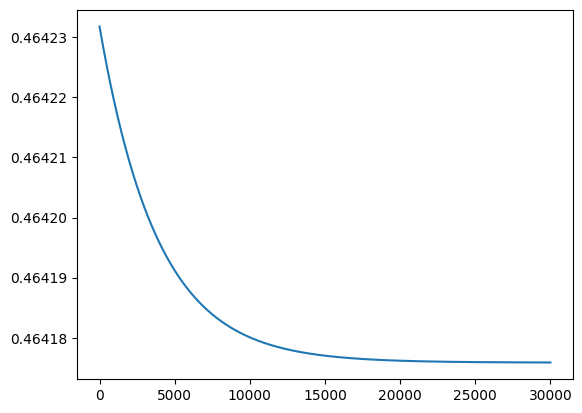

In [16]:
iterations = 30000
alpha = 0.01
beta = np.zeros((6,1))

# call the gradient_descent function
beta, J_storage = gradient_descent_linreg(X,target,beta,alpha,iterations)

# call the predict method to get the predicted values
pred = predict_linreg(df_feature_test,beta)

beta, J_storage = gradient_descent_linreg(X, target, beta, alpha, iterations)
print('beta values:\n{}'.format(beta))
print('\n')

plt.plot(J_storage)

#### Finding the predicted data points

In [17]:
pred = predict_linreg(df_feature_test,beta)
print('predicted data points:\n{}'.format(pred))

predicted data points:
[[14.58998829]
 [17.09252   ]
 [15.68889336]
 [19.26875279]
 [20.99014862]
 [25.08625531]
 [26.11058936]
 [25.91268504]
 [28.48087377]
 [35.29054237]
 [36.54425109]]


#### Scatterplots to visualize the relationship between predicted and actual values

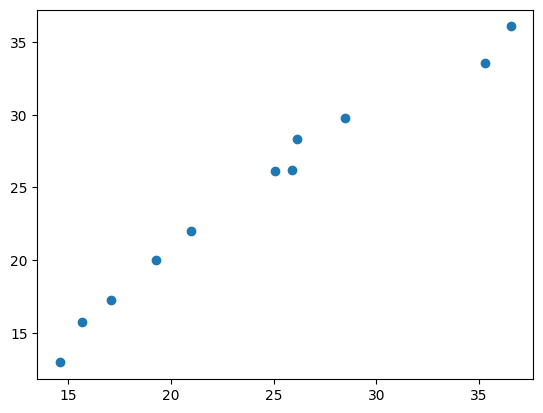

In [18]:
plt.scatter(pred,df_target_test)

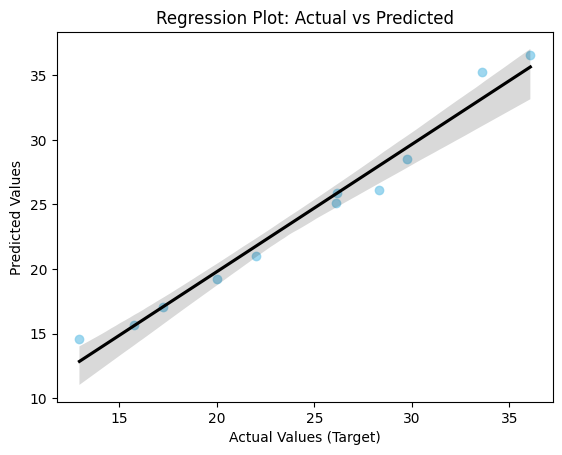

In [19]:
target = np.array(df_target_test)
sns.regplot(x=target, y=pred, scatter_kws={"color": "skyblue"}, line_kws={"color": "black"})
plt.xlabel('Actual Values (Target)')
plt.ylabel('Predicted Values')
plt.title('Regression Plot: Actual vs Predicted')
plt.show()

In [20]:
r2 = r2_score(df_target_test, pred)
print('r2: {}'.format(r2))

#Find adjusted r2
num_data_pts, num_xvariables = df_feature.shape
adjusted_r2 = 1 - (1-r2) * (num_data_pts-1)/(num_data_pts-num_xvariables-1)
print('Adjusted_r2: {}'.format(adjusted_r2))

mse = mean_squared_error(df_target_test, pred)
print('MSE: {}'.format(mse))

r2:           Yield
Yield  0.973059
Adjusted_r2:          Yield
Yield  0.97031
MSE: [[1.35335226]]


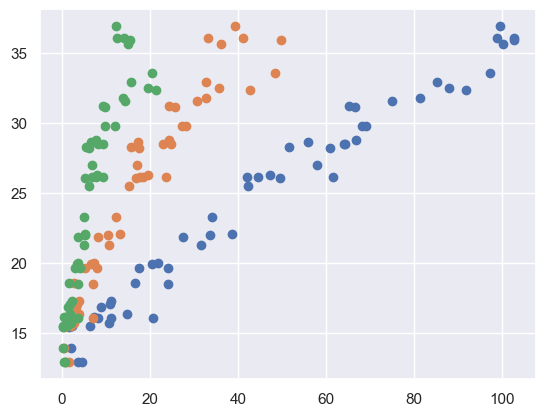

In [21]:
sns.set()
plt.scatter(df_combined["Nutrients_N"], df_target)

sns.set()
plt.scatter(df_combined["Nutrients_Ph"], df_target)

sns.set()
plt.scatter(df_combined["Nutrients_P"], df_target) 

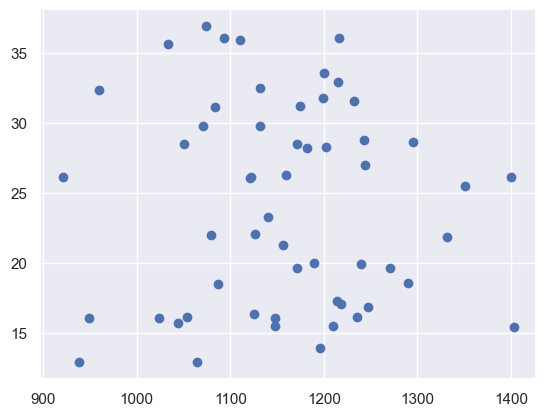

In [22]:
sns.set()
plt.scatter(df_combined["Rainfall"], df_target)

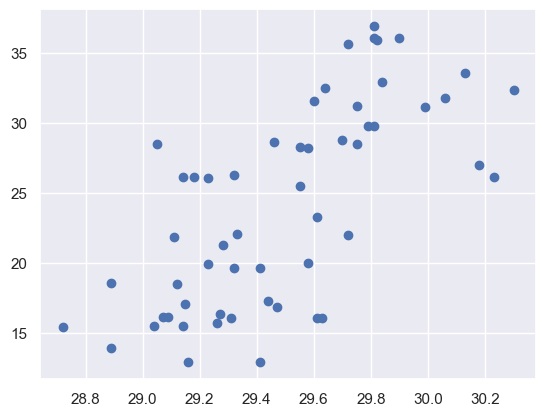

In [23]:
sns.set()
plt.scatter(df_combined["Temp"], df_target)

## Evaluating the Model
- Discussion on the chosen metric to evaluate your final model, how that model compares with your earlier attempts, any mathematical details, and all resources consulted.
- Code and results of the metric on your test data set.

#### Metrics used for evaluation
- Mean Squared Error
$$MSE = \frac{1}{n}\Sigma_{i=1}^n(y^i - \hat{y}^i)^2$$
- R2 Coefficient of Determination
$$r^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$

#### Our initial model

#### Cleaning and combining data to obtain the desired dataset

In [24]:
#combining all the fertilisers
new_nutrients_col=df_nitrogen["Nutrients_N"]+df_potash["Nutrients_P"]+df_phosphate["Nutrients_Ph"]

df_combined_new_nutrients=df_combined.copy()
df_combined_new_nutrients=df_combined_new_nutrients.drop(['Nutrients_N','Nutrients_Ph','Nutrients_P'],axis=1)
df_combined_new_nutrients["Total_Nutrients"]=new_nutrients_col

print(df_combined_new_nutrients)


    Rainfall   Temp   Yield  Year  Total_Nutrients
0     1403.0  28.72  15.419  1961             2.10
1     1196.4  28.89  13.959  1962             2.78
2     1210.2  29.04  15.498  1963             3.36
3     1235.1  29.09  16.171  1964             4.77
4      938.4  29.16  12.936  1965             4.84
5     1064.0  29.41  12.952  1966             6.76
6     1148.3  29.14  15.484  1967             9.40
7     1054.2  29.07  16.134  1968            10.69
8     1147.7  29.61  16.094  1969            12.05
9     1247.0  29.47  16.849  1970            13.67
10    1218.0  29.15  17.110  1971            16.15
11     948.5  29.31  16.046  1972            16.78
12    1214.0  29.44  17.259  1973            17.10
13    1043.7  29.26  15.744  1974            15.45
14    1290.2  28.89  18.582  1975            20.94
15    1124.8  29.27  16.372  1976            20.46
16    1270.4  29.41  19.613  1977            25.72
17    1239.3  29.23  19.912  1978            30.51
18    1023.4  29.63  16.105  19

#### Building the initial model and the results

In [25]:
#Build the model 

# get features and targets from data frame
df_feature_new, df_target_new = get_features_targets(df_combined_new_nutrients,["Rainfall","Temp","Total_Nutrients"],["Yield"])

# split the data into training and test data sets
df_feature_train_new, df_feature_test_new, df_target_train_new, df_target_test_new = split_data(df_feature_new,df_target_new,random_state=42,test_size=0.2)


# normalize the feature using z normalization
df_feature_train_z_new,means,stds = normalize_z(df_feature_train_new)


X_new = prepare_feature(df_feature_train_z_new)
target_new = prepare_target(df_target_train_new)

iterations_new = 30000
alpha_new = 0.01
beta_new = np.zeros((4,1))

# call the gradient_descent function
beta_new, J_storage_new = gradient_descent_linreg(X_new,target_new,beta_new,alpha_new,iterations_new)

# call the predict method to get the predicted values
pred_new = predict_linreg(df_feature_test_new,beta_new)

r2_new = r2_score(df_target_test_new, pred_new)
print("R2 value before seperating n p k content columns : ",r2_new)
print("R2 value after seperating n p k content columns : ",r2)

mse_new = mean_squared_error(df_target_test_new, pred_new)
print("MSE value before seperating n p k content columns : ",mse_new)
print("MSE value after seperating n p k content columns : ",mse)





R2 value before seperating n p k content columns :            Yield
Yield  0.927894
R2 value after seperating n p k content columns :            Yield
Yield  0.973059
MSE value before seperating n p k content columns :  [[3.62223866]]
MSE value after seperating n p k content columns :  [[1.35335226]]


#### Evaluation

For our initial model, the datasets we used for training and testing includes:
- Total amount of fertiliser used per cropland area in India from 1961-2021
- Annual rainfall in India from 1901-2015
- Annual temperature in India from 1901-2015

Using these datasets, the r2 value and MSE was 0.927894 and 3.62223866 respectively. Considering the range of values for rice yield in India is from 15.419 to 42.137, within the year 1961-2015, MSE is considerably high which indicates lack of effective learning for the model. This can result in inaccurate predictions as the average difference between the actual and predicted value of rice yield is fairly high and thus, we decided to try a different dataset for training and testing, to improve the model.

For our current model, the datasets we used for training and testing includes:
- Amount of nitrogen fertilisers used per cropland area in India from 1961-2015
- Amount of phosphate fertilisers used per cropland area in India from 1961-2015
- Amount of potash fertilisers used per cropland area in India from 1961-2015
- Annual rainfall in India from 1901-2015
- Annual temperature in India from 1901-2015

Using these datasets, the r2 value and MSE was 0.973059 and 1.35335226 respectively. Compared to the previous model, the current r2 value is considerably higher and the MSE is lower, indicating that achieved regression has a better fit to the actual values compared to the previous model. This model also takes into account the specific impacts that each fertiliser have on the rice yield which makes it more transparent and improves its ability to generalise new data. Overall, the current model will be able to more accurately predict rice yield, making a more ideal model to use.

#### Visualisation of the improvements made to our initial model

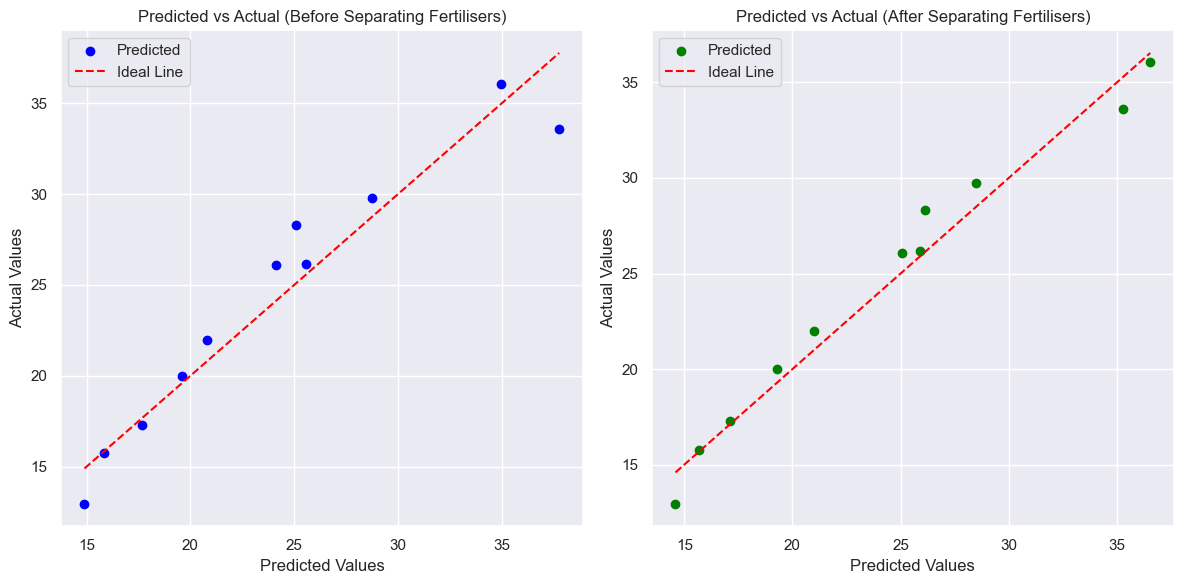

In [26]:
plt.figure(figsize=(12, 6))

# Scatter plot for predicted values before separating the fertilisers
plt.subplot(1, 2, 1)
plt.scatter(pred_new, df_target_test_new, color='blue', label='Predicted')
plt.plot([min(pred_new), max(pred_new)], [min(pred_new), max(pred_new)], linestyle='--', color='red', label='Ideal Line')
plt.title('Predicted vs Actual (Before Separating Fertilisers)')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.legend()

# Scatter plot for predicted values after separating fertilisers
plt.subplot(1, 2, 2)
plt.scatter(pred, df_target_test, color='green', label='Predicted')
plt.plot([min(pred), max(pred)], [min(pred), max(pred)], linestyle='--', color='red', label='Ideal Line')
plt.title('Predicted vs Actual (After Separating Fertilisers)')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.legend()

plt.tight_layout()
plt.show()

## Improving the Model

Discuss any steps you can do to improve the models. Put any python codes. You can repeat the steps above with the codes to show the improvement in the accuracy. 

#### Improvements
1. Changing the model from Linear Regression to Polynomial Regression
  - Polynomial regression mitigates underfitting by introducing higher-order terms, allowing the model to capture more intricate details in the data.
  - Our r2 value increased and MSE decreased , showing Accuracy.
  - In agriculture , multiple factors interact to produce crop yield ,therefore , Polynomial terms allow for capturing interactions between features, offering a more better understanding of how various factors work together to influence crop yield
  
2. More Datapoints
  - Increases stability and reliability of model due to more accurate reflection of the model's true capabilities
  - more robust in the face of variations and uncertainties present in real-world applications
  - better feature learning for model, that leads to better results

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

degree = 3 
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
features = df_combined[["Rainfall", "Temp", "Nutrients_N", "Nutrients_P", "Nutrients_Ph"]]
target = df_combined["Yield"]

# Fit the polynomial model
poly_model.fit(features,target)

# Evaluate the model
poly_predictions = poly_model.predict(df_feature_test)
mae_poly = mean_absolute_error(y_true=df_target_test, y_pred=poly_predictions)
mse_poly = mean_squared_error(y_true=df_target_test, y_pred=poly_predictions)
r2_poly = r2_score(y_true=df_target_test, y_pred=poly_predictions)

print("Polynomial Model - Mean Absolute Error:", mae_poly)
print("Polynomial Model - Mean Squared Error:", mse_poly)
print("Polynomial Model - R-squared:", r2_poly)




Polynomial Model - Mean Absolute Error: 0.002836408265231198
Polynomial Model - Mean Squared Error: 1.6774005920884916e-05
Polynomial Model - R-squared: 0.999999666087824


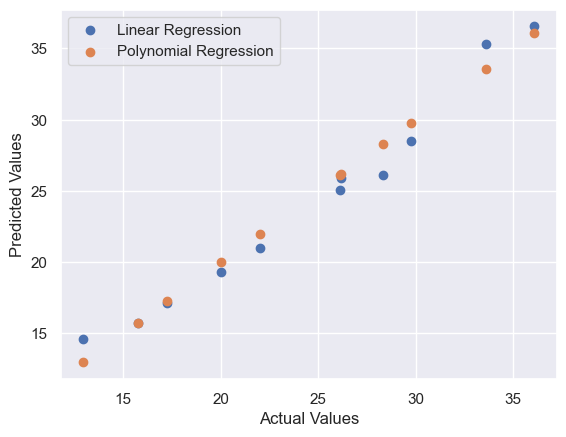

In [28]:
# Scatter plot to visually compare model predictions with actual values.
# Ideally, points should align along the 45-degree diagonal line.
# Closeness to the line and the spread of points provide insights into model accuracy.
# Compare linear and polynomial regression plots to assess model performance.

# Scatter plot for Linear Regression
plt.scatter(df_target_test, pred, label='Linear Regression')

# Scatter plot for Polynomial Regression
plt.scatter(df_target_test, poly_predictions, label='Polynomial Regression')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


## Discussion and Analysis

Discuss your model and accuracy in solving the problem. Analyze the results of your metrics. Put any conclusion here.

In our pursuit of addressing food security and safety concerns, we created a multiple regression model for farmers to predict crop yield based on factors such as Precipitation, Rainfall and Nutrients in the Country. We created a simple model for rice yield in India, and have further plans to create further sub models for countries and different crops.

Our major aim is to help farmers identify and predict crop yeild based on the features, so that farmers can strategically determine the optimal amount of fertilisers required for their soil, plan their crop timelines effectively, and make informed decisions based on anticipated climate conditions that will lead to better food security.

Analyzing our model helped us better understand our model and its accuracy.

### R2 analysis
R2 value between 0.2 to 1 indicates a Good Fit and ability to predict data accurately

In [29]:
print(r2)

          Yield
Yield  0.973059


### MSE Analysis
MSE value of 1.35 indicates that the average difference between the predicted and actual crop yield is 1.35 per 100kg/hectare.

In [30]:
print(mse)

[[1.35335226]]


### Residual analysis
As the points for the scatter plot are scattered around the zero line, it indicates that our model makes unbiased predictions with good variability


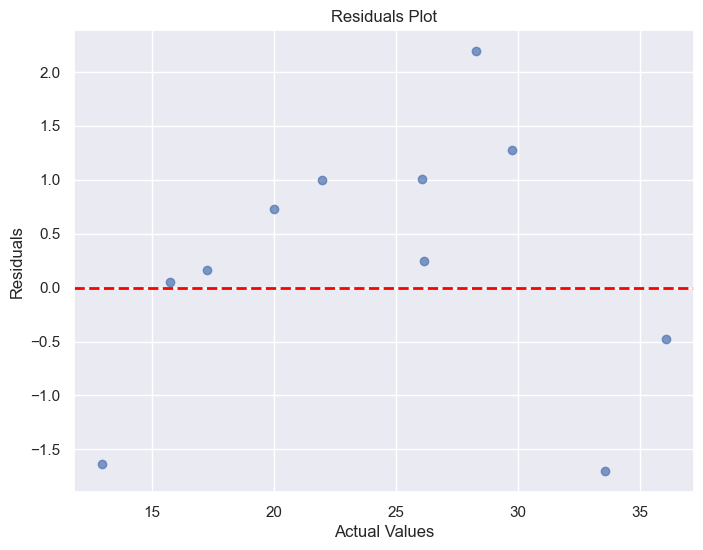

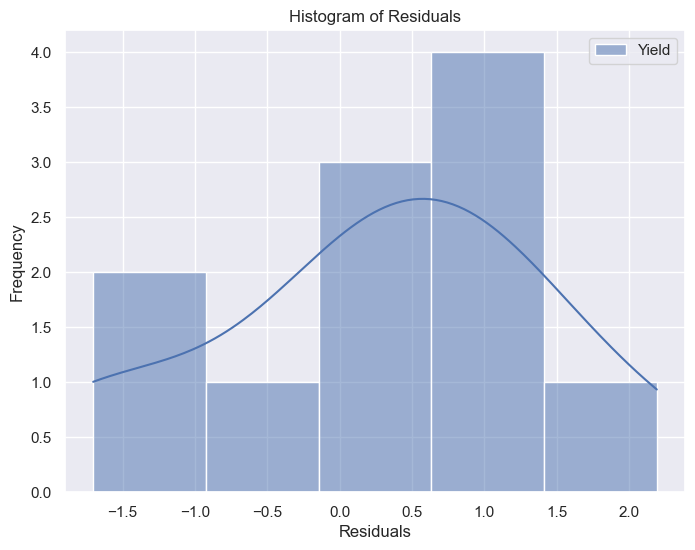

In [31]:
residuals = df_target_test - pred

# Scatter plot of residuals
plt.figure(figsize=(8, 6))
plt.scatter(df_target_test, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

# Histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='skyblue')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


### Beta coefficient
Each feature's beta value represents the change in the predicted output (crop yield) for a one-unit change in that particular feature, holding other features constant

In [32]:
print('All beta values:\n{} '.format(beta))
print('beta0: {}'.format(beta[0]))

All beta values:
[[ 2.40959545e+01]
 [ 7.23184627e-01]
 [ 3.00097804e-03]
 [ 7.69547899e+00]
 [-7.27850950e-01]
 [ 2.28170777e-01]] 
beta0: [24.09595455]


With a beta value of 0.72, an increase in rainfall by one mm is associated with an increase in crop yield (100kg/Hectare), keeping the other values constant.

In [33]:
print('beta1: {}'.format(beta[1]))
print('beta2: {}'.format(beta[2]))
print('beta3: {}'.format(beta[3]))
print('beta4: {}'.format(beta[4]))
print('beta5: {}'.format(beta[5]))

beta1: [0.72318463]
beta2: [0.00300098]
beta3: [7.69547899]
beta4: [-0.72785095]
beta5: [0.22817078]


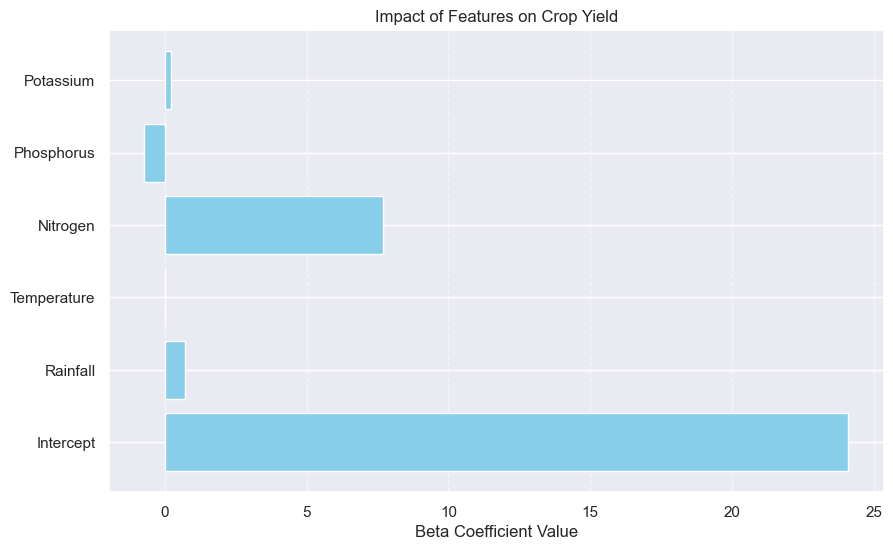

In [34]:
import matplotlib.pyplot as plt
import numpy as np


feature_names = ["Intercept", "Rainfall", "Temperature", "Nitrogen", "Phosphorus", "Potassium"]


beta_values = [24.10, 0.72, 0.003, 7.70, -0.73, 0.23]

# Plot the beta values
plt.figure(figsize=(10, 6))
plt.barh(feature_names, beta_values, color='skyblue')
plt.xlabel('Beta Coefficient Value')
plt.title('Impact of Features on Crop Yield')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()

Through Research we found that only phosphate content in the soil can have a negative impact on important soil organisms such as fungi that will prevent healthy plant growth, that justifies its negative impact on crop yield.

We also found that nitrogen content in the soil has a greater positive impact on rice compared to other nutrients due to its importance in photosynthesis for plants that justifies its importance for crop yields

### Limitations
1. The model doesn't consider region-specific farming methods
2. Model limitations in areas heavily reliant on advanced technology
3. Model lacks adaptability to real-time market changes

### Conclusion

Our goal is not just to benefit individual farmers but to positively impact the global community, through increasing production of rice, a major crop exported from india to all over the world. In the future, we aim to broaden our model's scope, covering multiple countries and diverse crops. 

In conclusion, our regression model serves as a valuable tool for predicting rice yield in India based on key features like soil nutrients, temperature, and precipitation. Through extensive analysis and evaluation, we have established a robust model that shows a high degree of accuracy, as evidenced by the R-squared value and other relevant metrics. 
By understanding the relationships between environmental factors and rice production, farmers can make informed decisions, optimizing nutrient application and adapting cultivation practices to climatic conditions. 

As we strive for a more comprehensive understanding of the factors influencing rice cultivation, our work lays the foundation for future advancements in agricultural modeling, ultimately supporting food security and fostering sustainable farming practices.